In [415]:
!pip install pandas
!pip install seaborn

In [416]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [417]:
### Loading the Dataset
df=pd.read_csv('./data/Oakland_Auto_Theft.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CrimeType    149889 non-null  object
 1   DateTime     152727 non-null  object
 2   CaseNumber   152727 non-null  object
 3   Description  152727 non-null  object
 4   PoliceBeat   152196 non-null  object
 5   Address      152677 non-null  object
 6   City         152727 non-null  object
 7   State        152727 non-null  object
 8   Location     152726 non-null  object
dtypes: object(9)
memory usage: 10.5+ MB


In [418]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Categorical']= le.fit_transform(df['CrimeType']) 
  
df['Categorical'].unique() 

array([68, 55, 63, 40, 50, 72, 66, 27, 36,  3,  8, 53, 11, 61, 17,  9, 67,
       43, 45, 71, 15, 29, 20, 23, 10, 24, 21, 22, 28, 30, 35, 26, 33, 46,
       32, 54, 19, 69, 41, 56, 34, 48, 18, 14, 47, 58,  7,  2, 25, 37, 49,
        6, 65, 44, 62, 12, 64, 42, 39, 70, 16, 31, 59,  4, 60, 52,  1,  0,
       57, 51,  5, 38, 13])

In [419]:
### Police Beat Unique values
df['PoliceBeat'].unique()

array(['31Y', '06X', '16Y', '32Y', '07X', '27Y', '10Y', '31Z', '01X',
       '15X', '23X', '08X', '12X', '29X', '02Y', '34X', '77X', '05X',
       '14X', '32X', '33X', '10X', '27X', '26X', '24Y', '03Y', '35Y',
       '21Y', '14Y', '13Z', '35X', '18Y', '17X', '26Y', '13Y', '19X',
       '22Y', '25X', '02X', '30X', '20X', '30Y', '03X', '99X', '22X',
       '24X', '21X', '11X', '25Y', '05Y', '04X', '31X', '17Y', '13X',
       '12Y', '09X', '33Y', '28X', '16X', '18X', '35', '327', '32', 'PCW',
       '4', '5', '28', 'PDT2', nan, '17 Y', '6X', '02 X', '1', '94603',
       '3X', '2Y', '7X', '30 X', '8X', '17', '9X', '27 Y', '29', '1X',
       '4X', '3Y', '7', '06 X', '31 Z', '04Y', '1Y', '0', '22', '2X', 'X',
       '34Y', '5Y', '88X', 'P3', '30', '07', '34', '27', '21', '26', '08',
       '33', '24', '10', '12', '31', '20', '18', '03', '25', '5X', '16',
       '04', '02', '06', '09', '05', '19', '01', '8', '11', '23', '6',
       '13', '14', '9', '15', 'CCD2'], dtype=object)

In [420]:
### Convert string DateTime to DateTime type object
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Windows\Temp\ipykernel_2744\3175685190.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [421]:

### Split Day, Month, Year, Hour in DateTime object
df['Day'] = df['DateTime'].dt.day
df['Month']= df['DateTime'].dt.month
df['Year']= df['DateTime'].dt.year
df['Hour']= df['DateTime'].dt.hour
df['DayOfWeek']= df['DateTime'].dt.weekday
df["DayOfWeekName"]= df['DateTime'].dt.strftime('%A')

In [422]:
### Dropping non-important features
df.drop(['CaseNumber', 'DateTime', 'Description', 'City', 'State'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Categorical    152727 non-null  int32 
 5   Day            152727 non-null  int32 
 6   Month          152727 non-null  int32 
 7   Year           152727 non-null  int32 
 8   Hour           152727 non-null  int32 
 9   DayOfWeek      152727 non-null  int32 
 10  DayOfWeekName  152727 non-null  object
dtypes: int32(6), object(5)
memory usage: 9.3+ MB


In [423]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Categorical,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),68,30,9,2022,23,4,Friday
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),55,5,10,2022,3,2,Wednesday
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),63,27,11,2013,11,2,Wednesday
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),40,19,12,2013,23,3,Thursday
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),63,28,1,2014,11,1,Tuesday


In [424]:
### Split the location to X, Y coordinates
df[['Point','X', 'Y']] = df['Location'].str.split(' ', expand= True)

In [425]:
### Remove "(" ")" from X and Y columns
### Drop unnecessary 'Point' columns
df['X']= df['X'].str.slice(1)
df['Y'] = df['Y'].str.rstrip(')')
df.drop('Point', axis = 1, inplace= True)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Categorical    152727 non-null  int32 
 5   Day            152727 non-null  int32 
 6   Month          152727 non-null  int32 
 7   Year           152727 non-null  int32 
 8   Hour           152727 non-null  int32 
 9   DayOfWeek      152727 non-null  int32 
 10  DayOfWeekName  152727 non-null  object
 11  X              152726 non-null  object
 12  Y              152726 non-null  object
dtypes: int32(6), object(7)
memory usage: 11.7+ MB


In [427]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Categorical,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),68,30,9,2022,23,4,Friday,-122.186243032,37.736909007
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),55,5,10,2022,3,2,Wednesday,-122.274354017,37.81511099
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),63,27,11,2013,11,2,Wednesday,-122.219454982,37.810370982
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),40,19,12,2013,23,3,Thursday,-122.153223028,37.740880981
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),63,28,1,2014,11,1,Tuesday,-122.277448029,37.822463008


In [428]:
### Convert from String to FLoat
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

In [429]:
### Remove Location column
df.drop('Location', axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrimeType      149889 non-null  object 
 1   PoliceBeat     152196 non-null  object 
 2   Address        152677 non-null  object 
 3   Categorical    152727 non-null  int32  
 4   Day            152727 non-null  int32  
 5   Month          152727 non-null  int32  
 6   Year           152727 non-null  int32  
 7   Hour           152727 non-null  int32  
 8   DayOfWeek      152727 non-null  int32  
 9   DayOfWeekName  152727 non-null  object 
 10  X              152726 non-null  float64
 11  Y              152726 non-null  float64
dtypes: float64(2), int32(6), object(4)
memory usage: 10.5+ MB


In [430]:
df.head(5)

,CrimeType,PoliceBeat,Address,Categorical,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y
0,TOWED VEHICLE,31Y,9609 MADDUX DR,68,30,9,2022,23,4,Friday,-122.186243,37.736909
1,ROBBERY,06X,2420 SAN PABLO AV,55,5,10,2022,3,2,Wednesday,-122.274354,37.815111
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,63,27,11,2013,11,2,Wednesday,-122.219455,37.810371
3,OTHER,32Y,2374 108TH AV,40,19,12,2013,23,3,Thursday,-122.153223,37.740881
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,63,28,1,2014,11,1,Tuesday,-122.277448,37.822463


In [431]:
### Add Delimiter for Address
df["Address"]= df["Address"].str.replace(" ", ", " ,1)
df["Address"]= df["Address"].str[::-1]
df["Address"]= df["Address"].str.replace(" ", ", " ,1)
df["Address"]= df["Address"].str[::-1]

In [432]:
### Add AddressNum,  AddressName and StreetType
address_split = df["Address"].str.split(',', expand= True)
df["AddressNum"] = address_split[0]
df["AddressName"] = address_split[1]
df["StreetType"] = address_split[2]

<Axes: xlabel='DayOfWeekName', ylabel='count'>

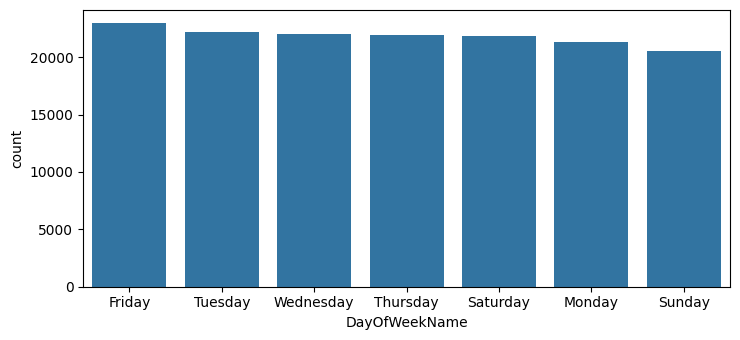

In [433]:
sns.barplot(df["DayOfWeekName"].value_counts())

<Axes: xlabel='Hour', ylabel='count'>

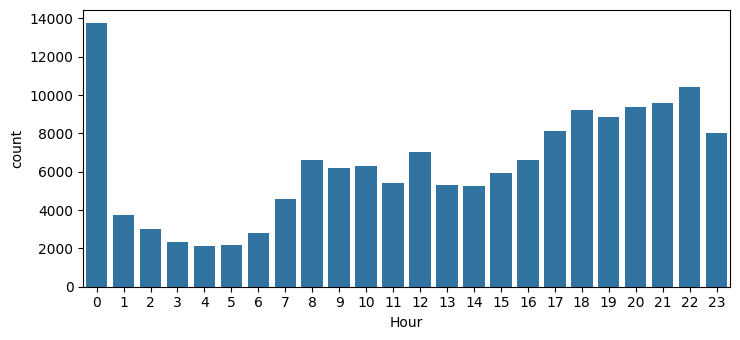

In [434]:
sns.barplot(df["Hour"].value_counts())

(0.0, 24.5)

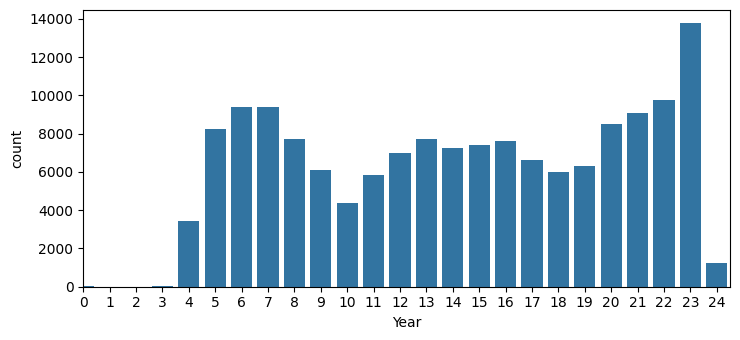

In [435]:
df['Year']= df["Year"]%100
fig, ax = plt.subplots()
ax= sns.barplot(df["Year"].value_counts(), ax=ax)
ax.set_xlim(0,24.5)

<Axes: xlabel='Month', ylabel='count'>

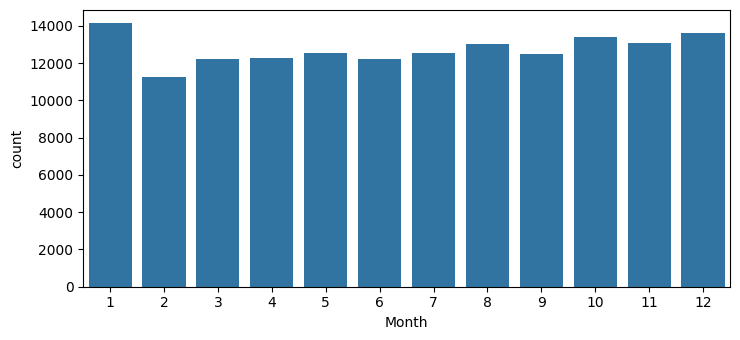

In [436]:
sns.barplot(df["Month"].value_counts())

<Axes: xlabel='Day', ylabel='count'>

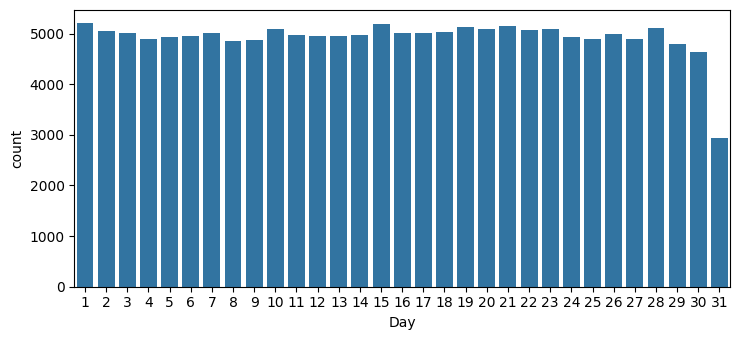

In [437]:
sns.barplot(df["Day"].value_counts())

In [440]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'09 DISPATCHED CALL': 0, '10851 O/S RECOVERY': 1, 'ARREST': 2, 'ARSON': 3, 'ASSAULT': 4, 'ATTEMPTED 10851': 5, 'AUTO HTEFT': 6, 'AUTO THEFT': 7, 'BURG - AUTO': 8, 'BURG - COMMERCIAL': 9, 'BURG - OTHER': 10, 'BURG - RESIDENTIAL': 11, 'CARJACKING': 12, 'CHILD ABUSE': 13, 'CURFEW & LOITERING': 14, 'DISORDERLY CONDUCT': 15, 'DISPATCHED CALL': 16, 'DOMESTIC VIOLENCE': 17, 'DRUNKENNESS': 18, 'DUI': 19, 'EMBEZZLEMENT': 20, 'FELONY ASSAULT': 21, 'FELONY WARRANT': 22, 'FORCIBLE RAPE': 23, 'FORGERY & COUNTERFEITING': 24, 'FOUND VEHICLE': 25, 'FRAUD': 26, 'GRAND THEFT': 27, 'HOMICIDE': 28, 'INCIDENT TYPE': 29, 'KIDNAPPING': 30, 'LOST VEHICLE': 31, 'MISCELLANEOUS TRAFFIC CRIME': 32, 'MISDEMEANOR ASSAULT': 33, 'MISDEMEANOR WARRANT': 34, 'MISSING': 35, 'NARCOTICS': 36, 'O/S AGNCY REPT-OAKLAND 10851': 37, 'O/S AGNCY RPT-OAKLAND 10851': 38, 'ON-VIEW': 39, 'OTHER': 40, 'OTHER SEX OFFENSES': 41, 'OUTSIDE AGENCY ARREST': 42, 'OUTSIDE AGENCY INCIDENT': 43, 'OUTSIDE STOLEN RECOVERY': 44, 'PETTY THEFT': 45